
# Módulo 1: Paradigma Procedural vs. Orientado a Objetos

 Este notebook é parte do hands-on de POO para Engenharia de Dados

 @nhayerclavijo, @giovanigerevini - Engedata (2025)
 
 ---

## Paradigma Procedural

- Baseado em **funções** que recebem dados e retornam resultados  

```python
def curva(x, a, b):
    return a * x + b
```

- Fluxo linear: **entrada → processamento → saída**  
ex. 

```python
# Executa ajuste de curva
analise_descritiva(x_raw)
x = pretratemento(x_raw)
y_raw = curva(x_raw,a,b)
y = pretratamento(y_raw)
analise_descritiva(y)
plt.plot(y) 
....
```
---

## Paradigma Orientado a Objetos (POO)
- Organiza em **objetos** (dados + métodos)  

``` python
class Curva:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def pretratamento(self, x):
        return x - min(x)

    def calc_curva(self, x):
        return self.a * x + self.b

    def analise_descritiva(self, y):
        return {'media': y.mean(), 'max': y.max(), 'min': y.min()}

    def main(self, x):
        x_trat = self.pretratamento(x)
        y = self.calc_curva(x_trat)
        return self.analise_descritiva(y)
```

- Enfatiza **reuso, encapsulamento, extensibilidade**  

Exemplo de uso:

```python
# Uso:
import numpy as np
x = np.array([1, 2, 3])
curva = Curva(a=2, b=1)
resultado = curva.main(x)
print(resultado)
```
---

## Python e POO

- **Multiparadigma**: procedural + POO  

- Sintaxe simples p/ funções, suporte completo a **classes e herança**  

- Permite começar procedural e evoluir p/ POO conforme o projeto cresce

---

# Construindo um modelo de Vazão Virtual

Imagine a segiunte tarefa:

- Criar um medidor virtual de vazão, a partir da medição de diferencial de pressão medidor.

In [92]:
import numpy as np

sinal_delta_P = np.random.uniform(low=5e4, high=10e4, size=100)  # Pa
sinal_Pin = np.random.uniform(low=5e5, high=10e5, size=100)  # Pa

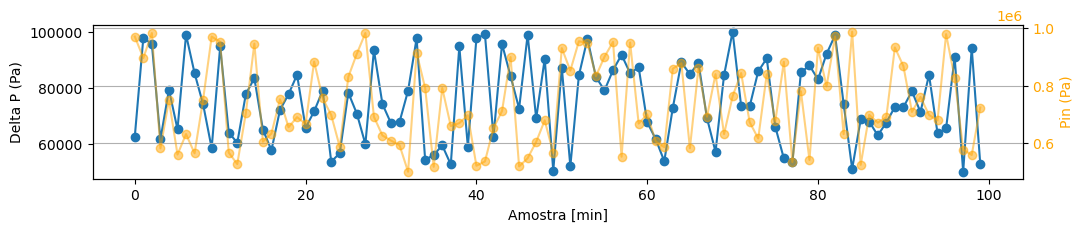

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 2))
plt.plot(sinal_delta_P, 'o-')
plt.xlabel('Amostra [min]')
plt.ylabel('Delta P (Pa)')


ax2 = plt.gca().twinx()
ax2.plot(Pin, 'o-', color='orange', alpha=0.5)
ax2.set_ylabel('Pin (Pa)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.ylabel('Pin (Pa)')
plt.grid()
plt.show()

---

## Modelo de vazão volumétrica simplificado:

Primeiramente, precisamos de um modelo

Aqui, consideremos as seguintes premissas de um modelo do tipo:

$$Q = C_d \cdot Y \cdot A \cdot \sqrt{\frac{2 \cdot \Delta P}{\rho}} \quad \text{(eq.1)}$$

onde:

- $C_d$ = coeficiente de descarga (adimensional)
- $Y$ = fator de compressibilidade (adimensional) 
- $A$ = área efetiva do orifício (m²)
- $\Delta P$ = diferencial de pressão (Pa)
- $\rho$ = densidade do fluido (kg/m³)


Vamos implementá-lo em uma função chamada calcula_vazao_massica

In [162]:
def calcula_vazao_volumetrica(Cd : float, Y: float, A: float, deltaP: float, rho: float) -> float:
    ''' Calcula a vazão mássica através de um orifício

        Q = Cd * Y * A * (2 * deltaP / rho) ** 0.5
        
        Parâmetros:    
            Cd (float): Coeficiente de descarga (adimensional)
            Y (float): Fator de compressibilidade (adimensional)
            A (float): Área efetiva do orifício (m2)
            deltaP (float): Queda de pressão (Pa)
            rho (float): Densidade do fluido (kg/m3)

        Retornos: 
            Q (float): Vazão volumétrica (m3/s)
            
        Exceções:
            AssertionError: Se Cd <= 0
            Condicional: Se deltaP <= 0, um condicional garante deltaP não negativo.
    '''
    
    assert Cd > 0, "Cd deve ser maior que zero"

    # Garante que deltaP é positivo, seja escalar ou array/lista
    if isinstance(deltaP, (list, np.ndarray)):
        deltaP = np.array(deltaP)
        deltaP = np.where(deltaP < 0, 0, deltaP)
    else:
        deltaP = 0 if deltaP < 0 else deltaP
    
    Q = Cd * A * Y * (2 * deltaP / rho) ** 0.5

    return Q

Observe o uso de algumas boas práticas de programação...

 - Padrão docstring é uma convenção para documentar funções, classes e módulos em Python. Acessível via help(função) ou função.__doc__, além de existirme ferramentas como SPhinx que geram documentação mais profissional. Obs.: Nem toda função merece uma documentação completa! Lembresse do KIS"

Como temos a função documentada, é possível tirarmos algumas teimas, antes de executar

In [163]:
print(calcula_vazao_volumetrica.__doc__)

 Calcula a vazão mássica através de um orifício

        Q = Cd * Y * A * (2 * deltaP / rho) ** 0.5
        
        Parâmetros:    
            Cd (float): Coeficiente de descarga (adimensional)
            Y (float): Fator de compressibilidade (adimensional)
            A (float): Área efetiva do orifício (m2)
            deltaP (float): Queda de pressão (Pa)
            rho (float): Densidade do fluido (kg/m3)

        Retornos: 
            Q (float): Vazão volumétrica (m3/s)
            
        Exceções:
            AssertionError: Se Cd <= 0
            Condicional: Se deltaP <= 0, um condicional garante deltaP não negativo.
    


In [164]:
print(np.random.uniform.__doc__)


        uniform(low=0.0, high=1.0, size=None)

        Draw samples from a uniform distribution.

        Samples are uniformly distributed over the half-open interval
        ``[low, high)`` (includes low, but excludes high).  In other words,
        any value within the given interval is equally likely to be drawn
        by `uniform`.

        .. note::
            New code should use the `~numpy.random.Generator.uniform`
            method of a `~numpy.random.Generator` instance instead;
            please see the :ref:`random-quick-start`.

        Parameters
        ----------
        low : float or array_like of floats, optional
            Lower boundary of the output interval.  All values generated will be
            greater than or equal to low.  The default value is 0.
        high : float or array_like of floats
            Upper boundary of the output interval.  All values generated will be
            less than or equal to high.  The high limit may be included in the 
 

 - Os Type Hints foram introduzidos no Python 3.5 (PEP 484) e são considerados uma boa prática em código Python moderno, especialmente em projetos maiores.

In [165]:
calcula_vazao_volumetrica.__annotations__

{'Cd': float,
 'Y': float,
 'A': float,
 'deltaP': float,
 'rho': float,
 'return': float}

In [166]:
try:
    calcula_vazao_volumetrica(1,1,1,'5',1)
except Exception as e:
    print(f"Erro: {e}")

Erro: '<' not supported between instances of 'str' and 'int'


 - O assert é uma declaração em Python usada para verificação de condições e depuração. É uma ferramenta de programação defensiva que ajuda a detectar problemas cedo no desenvolvimento.

In [167]:
try:
    calcula_vazao_volumetrica(-0.5, 1.0, 2000, 0.78, 850)
except Exception as e:
    print(f"Erro: {e}")

Erro: Cd deve ser maior que zero


Executando o cálculo para um cenário onde metano escoa à temperatura ambiente, em uma tubulação de aço inox com Cd e A são conhecidos para uma certa tubulação:

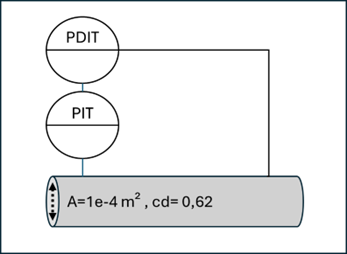

In [168]:
gas = 'methane'
mm_methane = 16.04  # kg/kmol
A = 1E-04  # m2
Cd = 0.62  # adimensional
dP = sinal_delta_P  # Pa

print(calcula_vazao_volumetrica.__doc__)

 Calcula a vazão mássica através de um orifício

        Q = Cd * Y * A * (2 * deltaP / rho) ** 0.5
        
        Parâmetros:    
            Cd (float): Coeficiente de descarga (adimensional)
            Y (float): Fator de compressibilidade (adimensional)
            A (float): Área efetiva do orifício (m2)
            deltaP (float): Queda de pressão (Pa)
            rho (float): Densidade do fluido (kg/m3)

        Retornos: 
            Q (float): Vazão volumétrica (m3/s)
            
        Exceções:
            AssertionError: Se Cd <= 0
            Condicional: Se deltaP <= 0, um condicional garante deltaP não negativo.
    


agora, como definirmos a densidade e a compressibilidade do nosso gás?

---

#### EOS Gás Ideal

Vamos considera a premissa inicial de calcular as propriedades considerando a idealidade, onde Y=1.

Para isso, vamos implementar um procedimento de cálculo da densidade pela EOS de gás ideal:

$$\rho_{GI} = \frac{(P \cdot mm)}{(R \cdot T)}             \text{(eq.2)}$$

onde:

- $\rho_{GI}$ = densidade calculada (kg/m³)
- $P$ = Pressão medida em (Pa) 
- $mm$ = massa molar (kg/kmol)
- $T$ = temperatura (K)  
- $R$ = constante dos gases ideais = 831.4 J/(kmol·K)

In [169]:
Y = 1.0  # adimensional

def rho_gas_ideal(P: float, mm: float, T: float, R: float = 8314) -> float:
    """Calcula a densidade de um gás ideal.
    
    Parâmetros:
        P (float): Pressão do gás em Pa.
        mm (float): Massa molar do gás em kg/kmol.
        T (float): Temperatura do gás em K.
        R (float): Constante dos gases ideais em J/(kmol·K) (Valor padrão: 831.4 J/(kmol·K)).
        
    Retorna:
        float: Densidade do gás em kg/m³.
    """
    return (P * mm) / (R * T) # kg/m³

---

### Observando a sensibilidade do modelo em relação às premissas

Observe que agora, nosso problema se resume a definição da propriedade do fluido, que é dependente da pressão e temperatura:

$$Q = C_d \cdot Y \cdot A \cdot \sqrt{\frac{2 \cdot \Delta P}{\frac{(P \cdot mm)}{(R \cdot T)}}} \quad \text{(eq.3)}$$

Em cidades como Porto Alegre, a faixa de temperatura pode variar consideravelmente ao longo do ano, o que pode afetar os cálculos, já que nossa tubulação não possui isolamento.

Imagine que a temperatura vari de 5 à 40C.

Além disso, os istema faz parte de uma linha de produção de gás. Ou seja, dependendo da condição de processo a pressão de entrada pode variar de 10 à 5 bar na alimentação.

In [170]:
T_list = np.linspace(278.15, 313.15, 5)  # K (5°C à 40°C)
P_list = np.linspace(1e5, 10e5, 5)  # Pa (1 bar à 10 bar)

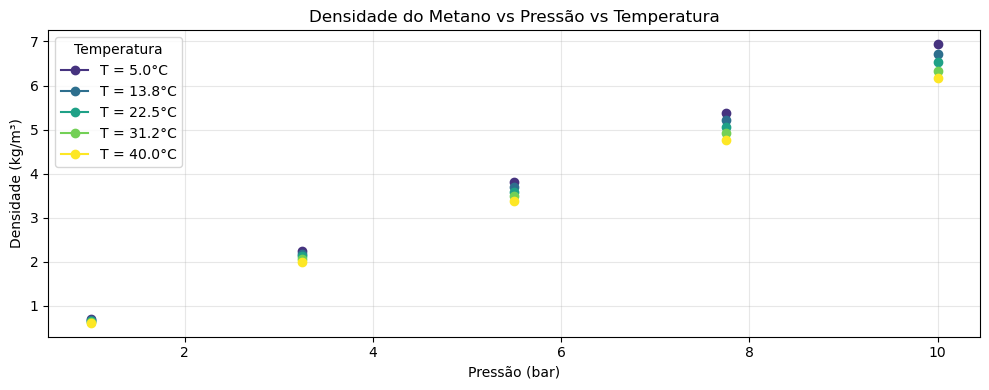

In [171]:
fig, ax = plt.subplots(figsize=(10, 4))
for T in T_list:
    for P in P_list:
        rho = rho_gas_ideal(P, mm_methane, T)
        ax.plot(P/1e5, rho, marker='o', label=f'T = {T - 273.15:.1f}°C', 
                c=plt.cm.viridis((T - 272.15) / (313.15 - 272.15)))

ax.set_xlabel('Pressão (bar)')
ax.set_ylabel('Densidade (kg/m³)')
ax.set_title('Densidade do Metano vs Pressão vs Temperatura')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title="Temperatura")

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Considerando o comportamento médio de T:


Text(0, 0.5, 'Densidade (kg/m³)')

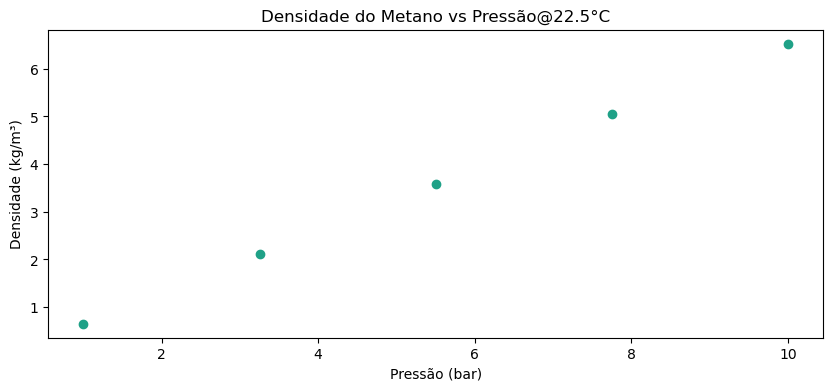

In [172]:
fig, ax = plt.subplots(figsize=(10, 4))
T = 22.5 + 273.15  # K (média de 5°C a 40°C)
for P in P_list:
    rho = rho_gas_ideal(P, mm_methane, T)
    ax.plot(P/1e5, rho, marker='o', label=f'T = {T - 273.15:.1f}°C', 
            c=plt.cm.viridis((T - 272.15) / (313.15 - 272.15)))
    
ax.set_title('Densidade do Metano vs Pressão@22.5°C')
ax.set_xlabel('Pressão (bar)')
ax.set_ylabel('Densidade (kg/m³)')


Agora, qual impacto disso no cálculo da vazão?

.... primeiro, definimos o nosso sensor virtual

In [173]:
def sensor_virtual(T: float, P: float, deltaP: float, mm: float, params: dict) -> float:
    """
    Calcula a vazão volumétrica usando modelos fornecidos.
    
    Q = params['Cd'] * params['A'] * Y * (2 * deltaP / rho) ** 0.5

    Parâmetros:
        T: temperatura (K)
        P: pressão (Pa)
        deltaP: diferencial de pressão (Pa)
        params: dicionário com parâmetros necessários (ex: {Cd: 0.61, A: 1e-4})

    Retorna:
        Q: vazão volumétrica (m³/s)

    Exceções:
        condicional: Se deltaP <= 0, um condicional garante deltaP não negativo.
    """

    R = 8314  # J/(kmol·K)

    rho = (P * mm) / (R * T) # kg/m³
    Y = 1

    Q = params['Cd'] * params['A'] * Y * (2 * deltaP / rho) ** 0.5
    
    return Q

Analisemos a sensiblidade do cálculo de vazão em relação a pressão de entrada no sistema

Text(0, 0.5, 'Vazão (m³/h)')

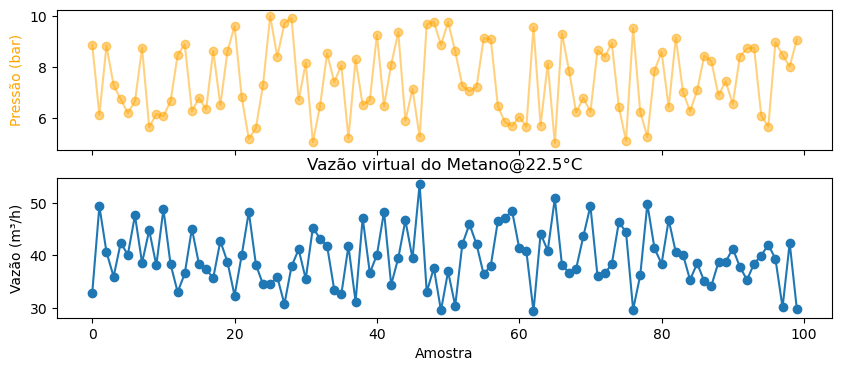

In [174]:
vazao_virtual = sensor_virtual(T, sinal_Pin, sinal_delta_P, mm_methane, {'Cd': Cd, 'A': A})

fig, axs = plt.subplots(2,figsize=(10, 4), sharex=True)
axs[0].plot(sinal_Pin/1e5, marker='o', color='orange', alpha=0.5)
axs[0].set_ylabel('Pressão (bar)', color='orange')

axs[1].plot(vazao_virtual*3600, marker='o')  
axs[1].set_title('Vazão virtual do Metano@22.5°C')
axs[1].set_xlabel('Amostra')
axs[1].set_ylabel('Vazão (m³/h)')

entretanto, existe uma relação entre pressão de entrada e delta pe no sistema que pode mudar consideravelmente a vazão calculada.

C:\Users\C3OM\AppData\Local\Temp\ipykernel_2500\790505473.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


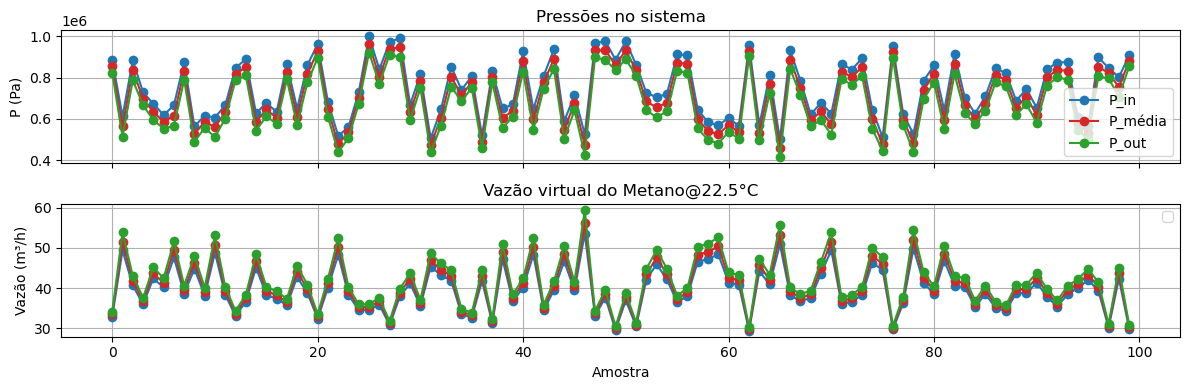

Vazão méida @ Pin: 39.58 m³/h
Vazão média @ P média: 40.71 m³/h
Vazão média @ P out: 41.94 m³/h
Variação percentual média de Vazão: 10.45%
Desvio médio em relação à média: 2.35 m³/h


In [175]:
# Calcula a porcentagem de deltaP em relação a Pin
percent_deltaP = 100 * sinal_delta_P / sinal_Pin
P_out = sinal_Pin - sinal_delta_P
vazao_virtual_out = sensor_virtual(T, P_out, sinal_delta_P, mm_methane, {'Cd': Cd, 'A': A})

P_media = (2 * sinal_Pin - sinal_delta_P) / 2
vazao_virtual_media = sensor_virtual(T, P_media, sinal_delta_P, mm_methane, {'Cd': Cd, 'A': A})

fig, axs = plt.subplots(2, 1, figsize=(12, 4), sharex=True)

axs[0].plot(sinal_Pin, 'o-', label='P_in')
axs[0].plot(P_media, 'o-', color='tab:red', label='P_média')
axs[0].plot(P_out, 'o-', color='tab:green', label='P_out')
axs[0].set_title('Pressões no sistema')
axs[0].set_ylabel('P (Pa)')
axs[0].legend()
axs[0].grid()

axs[1].plot(vazao_virtual*3600, marker='o')  
axs[1].plot(vazao_virtual_media*3600, color='tab:red', marker='o')  
axs[1].plot(vazao_virtual_out*3600, color='tab:green', marker='o')  
axs[1].set_title('Vazão virtual do Metano@22.5°C')
axs[1].set_xlabel('Amostra')
axs[1].set_ylabel('Vazão (m³/h)')
axs[1].legend()
axs[1].grid()

axs[1].set_xlabel('Amostra')
plt.tight_layout()
plt.show()

print(f"Vazão méida @ Pin: {np.mean(vazao_virtual)*3600:.2f} m³/h")
print(f"Vazão média @ P média: {np.mean(vazao_virtual_media)*3600:.2f} m³/h")
print(f"Vazão média @ P out: {np.mean(vazao_virtual_out)*3600:.2f} m³/h")

print(f"Variação percentual média de Vazão: {np.mean(percent_deltaP):.2f}%")

desvio_a_media = np.mean(np.abs(vazao_virtual - vazao_virtual_media) + np.abs(vazao_virtual_out - vazao_virtual_media))
print(f"Desvio médio em relação à média: {desvio_a_media*3600:.2f} m³/h")


Observe que, dependendo do problema, 10% de desvio, não faz diferença para o resultado final (quem tem nada, muito é muito!).

Mas existem cassos que devemos ser mais exigentes, o que nos leva a modificar alguma premissas....

Como por exemplo, se as condições de processo mudarem a ponto de não considerarmos mais um GI? Temos que mudar a EOS

Se a temperatura externa for função da amostra, para atribuirmos sazonalidades e diminir o erro?

Se....

Mas antes, perceba que a forma com que monstamos o problema, de forma procedural, nos exige construir novos procedimentos para cada informação.... mas podemos ser mais inteligentes. Por que não "herdar" as funções já definidas?

In [176]:
from typing import Callable

def sensor_virtual_proced(EquacaoVazao: Callable, EOS: Callable, T: float, P: float, deltaP: float, mm: float, params: dict) -> float:
    """
    Calcula a vazão volumétrica usando modelos fornecidos.

    Parâmetros:
        EquacaoVazao: função para cálculo da vazão (Q)
        EOS: função para cálculo da densidade (rho)
        T: temperatura (K)
        P: pressão (Pa)
        deltaP: diferencial de pressão (Pa)
        mm: massa molar (kg/kmol)
        params: dicionário com parâmetros necessários (ex: {Cd: 0.61, A: 1e-4})

    Retorna:
        Q: vazão volumétrica (m³/s)
    """
    
    rho = EOS(P, mm, T)
    Y = 1
    Q = EquacaoVazao(Cd=params['Cd'], Y=Y, A=params['A'], deltaP=deltaP, rho=rho)
    return Q

Por exemplo, agora se eu quiser subsituir a equação de estado, basta expormos uma nova EOS, e apenas chamar o sensor definido, sem necessidade de construí-lo novamente

In [177]:
def rho_gas_ggg(P: float, mm: float, T: float, R: float = 8314) -> float:
    """Calcula a densidade de um gás real (exemplo fictício).
    
    Parâmetros:
        P (float): Pressão do gás em Pa.
        mm (float): Massa molar do gás em kg/kmol.
        T (float): Temperatura do gás em K.
        
    Retorna:
        float: Densidade do gás em kg/m³.
    """
    # Exemplo fictício de cálculo de densidade para um gás real
    z = [1.5 if p > 5e5 else 1.0 for p in P]
    return (P * mm) / (R * T) * z  # kg/m³, considerando um fator de compressibilidade fictício

In [178]:
vazao_virtual_proc_ggg = sensor_virtual_proced(calcula_vazao_volumetrica, rho_gas_ggg, T, sinal_Pin, sinal_delta_P, mm_methane, {'Cd': Cd, 'A': A})
vazao_virtual_proc_ggg_out = sensor_virtual_proced(calcula_vazao_volumetrica, rho_gas_ggg, T, P_out, sinal_delta_P, mm_methane, {'Cd': Cd, 'A': A})
vazao_virtual_proc_ggg_media = sensor_virtual_proced(calcula_vazao_volumetrica, rho_gas_ggg, T, P_media, sinal_delta_P, mm_methane, {'Cd': Cd, 'A': A})

C:\Users\C3OM\AppData\Local\Temp\ipykernel_2500\3378120953.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


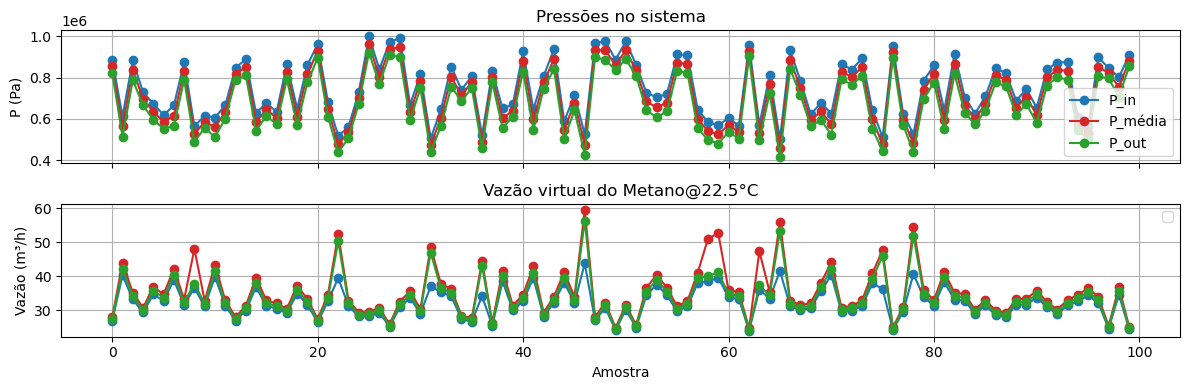

Vazão média @ Pin: 32.32 m³/h
Vazão média @ P média: 33.87 m³/h
Vazão média @ P out: 35.27 m³/h
Variação percentual média de Vazão: 10.45%
Desvio médio em relação à média: 2.95 m³/h


In [179]:
# Calcula a porcentagem de deltaP em relação a Pin
fig, axs = plt.subplots(2, 1, figsize=(12, 4), sharex=True)

axs[0].plot(sinal_Pin, 'o-', label='P_in')
axs[0].plot(P_media, 'o-', color='tab:red', label='P_média')
axs[0].plot(P_out, 'o-', color='tab:green', label='P_out')
axs[0].set_title('Pressões no sistema')
axs[0].set_ylabel('P (Pa)')
axs[0].legend()
axs[0].grid()

axs[1].plot(vazao_virtual_proc_ggg*3600, marker='o')  
axs[1].plot(vazao_virtual_proc_ggg_out*3600, color='tab:red', marker='o')  
axs[1].plot(vazao_virtual_proc_ggg_media*3600, color='tab:green', marker='o')  
axs[1].set_title('Vazão virtual do Metano@22.5°C')
axs[1].set_xlabel('Amostra')
axs[1].set_ylabel('Vazão (m³/h)')
axs[1].legend()
axs[1].grid()

axs[1].set_xlabel('Amostra')
plt.tight_layout()
plt.show()

print(f"Vazão média @ Pin: {np.mean(vazao_virtual_proc_ggg)*3600:.2f} m³/h")
print(f"Vazão média @ P média: {np.mean(vazao_virtual_proc_ggg_media)*3600:.2f} m³/h")
print(f"Vazão média @ P out: {np.mean(vazao_virtual_proc_ggg_out)*3600:.2f} m³/h")

print(f"Variação percentual média de Vazão: {np.mean(percent_deltaP):.2f}%")

desvio_a_media = np.mean(np.abs(vazao_virtual_proc_ggg - vazao_virtual_proc_ggg_media) + np.abs(vazao_virtual_proc_ggg_out - vazao_virtual_proc_ggg_media))
print(f"Desvio médio em relação à média: {desvio_a_media*3600:.2f} m³/h")

Observe que para cada atividade, elabora-se um procedimento, e mesmo análises "repetidas" .... quantas vezes não plotamos as mesmas funções, deifnimos os mesmos comandos mais de uma vez, tendo que renomear cada resultado...

Existe um jeito de melhorar nosso código:

a programação em classe!

In [180]:
class SensorVirtual:
    def __init__(self, EquacaoVazao: Callable, EOS: Callable, mm: float = 16.04, params: dict = {'Cd': 0.62, 'A': 1E-04}, R: float = 831.4):
        """Inicializa o sensor virtual de vazão.
        
        Parâmetros:
            Cd (float): Coeficiente de descarga (adimensional)
            A (float): Área efetiva do orifício (m²)
            mm (float): Massa molar do metano (kg/kmol)
            R (float): Constante dos gases ideais (J/(kmol·K))
        """
        self.EOS = EOS
        self.EquacaoVazao = EquacaoVazao
        self.Cd = params.get('Cd')
        self.A = params.get('A')
        self.mm = mm
        self.R = R

    def calcula_vazao_volumetrica(self, T: float, P: float, deltaP: float) -> float:
        """
        Calcula a vazão volumétrica usando os modelos fornecidos durante a inicialização.
        
        Parâmetros:
            T (float): Temperatura (K)
            P (float): Pressão (Pa)
            deltaP (float): Diferencial de pressão (Pa)
        
        Retorna:
            Q (float): Vazão volumétrica (m³/s)
        """
        rho = self.EOS(P, self.mm, T, self.R)
        Y = 1
        Q = self.EquacaoVazao(Cd=self.Cd, Y=Y, A=self.A, deltaP=deltaP, rho=rho)
        return Q

    def analise_visual_vazao_virtual(self, T: float, Pin: float, deltaP: float):

        Pmedia = (2 * Pin - deltaP) / 2
        Pout = Pin - deltaP

        # Calcula vazões nos limites
        Qin = self.calcula_vazao_volumetrica(T, Pin, deltaP)
        Qout = self.calcula_vazao_volumetrica(T, Pout, deltaP)
        Qmedia = self.calcula_vazao_volumetrica(T, Pmedia, deltaP)

        # Calcula a porcentagem de deltaP em relação a Pin
        fig, axs = plt.subplots(2, 1, figsize=(12, 4), sharex=True)

        axs[0].plot(Pin, 'o-', label='P_in')
        axs[0].plot(Pmedia, 'o-', color='tab:red', label='P_média')
        axs[0].plot(Pout, 'o-', color='tab:green', label='P_out')
        axs[0].set_title('Pressões no sistema')
        axs[0].set_ylabel('P (Pa)')
        axs[0].legend()
        axs[0].grid()

        axs[1].plot(Qin*3600, marker='o')  
        axs[1].plot(Qout*3600, color='tab:red', marker='o')  
        axs[1].plot(Qmedia*3600, color='tab:green', marker='o')  
        axs[1].set_title('Vazão virtual do Metano@22.5°C')
        axs[1].set_xlabel('Amostra')
        axs[1].set_ylabel('Vazão (m³/h)')
        axs[1].legend()
        axs[1].grid()

        axs[1].set_xlabel('Amostra')
        plt.tight_layout()
        plt.show()

        print(f"Vazão média @ Pin: {np.mean(Qin)*3600:.2f} m³/h")
        print(f"Vazão média @ Pmédia: {np.mean(Qout)*3600:.2f} m³/h")
        print(f"Vazão média @ Pout: {np.mean(Qmedia)*3600:.2f} m³/h")

        print(f"Variação percentual média de Vazão: {np.mean(percent_deltaP):.2f}%")

        desvio_a_media = np.mean(np.abs(Qin - Qmedia) + np.abs(Qout - Qmedia))
        print(f"Desvio médio em relação à média: {desvio_a_media*3600:.2f} m³/h")


In [181]:
sensor_virtual_instanc = SensorVirtual(calcula_vazao_volumetrica, rho_gas_ggg, mm=mm_methane, params={'Cd': Cd, 'A': A})

C:\Users\C3OM\AppData\Local\Temp\ipykernel_2500\594110172.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


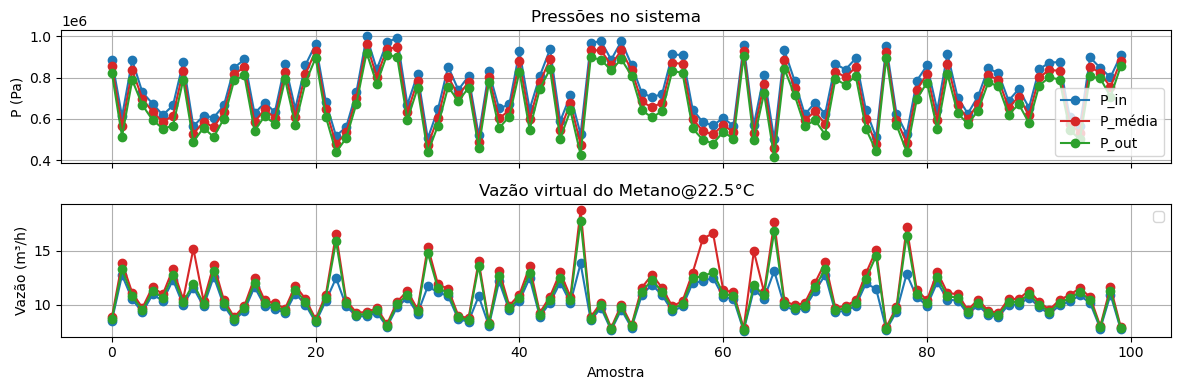

Vazão média @ Pin: 10.22 m³/h
Vazão média @ Pmédia: 11.15 m³/h
Vazão média @ Pout: 10.71 m³/h
Variação percentual média de Vazão: 10.45%
Desvio médio em relação à média: 0.93 m³/h


In [182]:
sensor_virtual_instanc.analise_visual_vazao_virtual(T, sinal_Pin, sinal_delta_P)

Agoora fica simples a substituição da EOS

In [183]:
sensor_virtual_instanc.EOS = rho_gas_ideal

C:\Users\C3OM\AppData\Local\Temp\ipykernel_2500\594110172.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


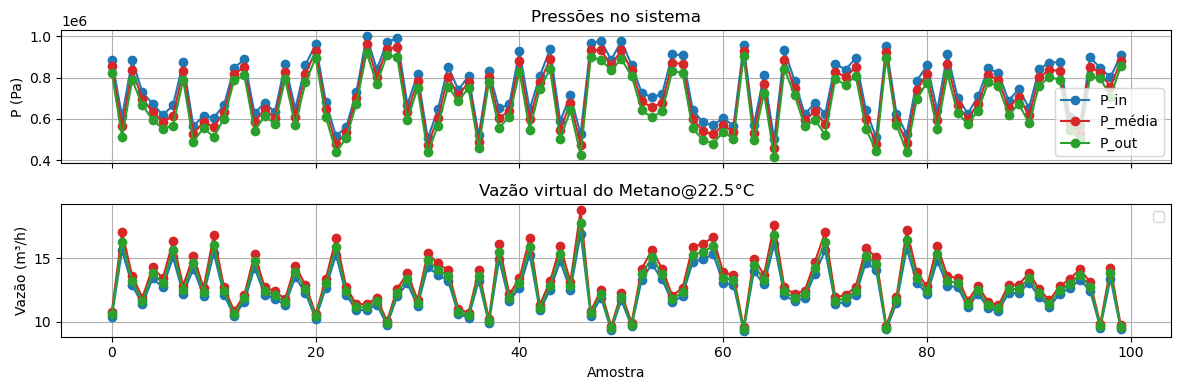

Vazão média @ Pin: 12.52 m³/h
Vazão média @ Pmédia: 13.26 m³/h
Vazão média @ Pout: 12.87 m³/h
Variação percentual média de Vazão: 10.45%
Desvio médio em relação à média: 0.74 m³/h


In [185]:
sensor_virtual_instanc.analise_visual_vazao_virtual(T, sinal_Pin, sinal_delta_P)

inclusive, se eu quiser herdar métodos de pacotes já existentes, por exemplo o CoolProp, podemos ageregar à classe...

In [204]:
from CoolProp.CoolProp import PropsSI

def calcular_vazao_coolprop(self, T: float, P: float, deltaP: float, fluido='Methane'):  

    """
    Calcula a vazão para diferentes condições de temperatura e pressão usando propriedades do CoolProp.

    Parâmetros:
        sinal_delta_P (array): Sinal de diferencial de pressão (Pa)
        T_list (list): Lista de temperaturas (K)
        P_list (list): Lista de pressões (Pa)
        Y (float): Fator de compressibilidade (adimensional)
        fluido (str): Nome do fluido para o CoolProp

    Retorna:
        dict: Dicionário com as vazões calculadas para cada condição
    """
    # Trata o caso de T e P serem arrays ou escalares
    if isinstance(P, (list, np.ndarray)):
        P = np.array(P)
        rho = PropsSI('D', 'T', T, 'P', P, fluido)
        Y = PropsSI('Z', 'T', T, 'P', P, fluido)
    else:
        rho = PropsSI('D', 'T', T, 'P', P, fluido)
        Y = PropsSI('Z', 'T', T, 'P', P, fluido)
    
    Q = self.EquacaoVazao(Cd=self.Cd, Y=Y, A=self.A, deltaP=deltaP, rho=rho)
    return Q

# Adicione este método à classe SensorVirtual:
SensorVirtual.calcular_vazao_coolprop = calcular_vazao_coolprop

In [205]:
sensor_virtual_instanc.calcular_vazao_coolprop(T, sinal_Pin, sinal_delta_P)

array([0.00891594, 0.01349084, 0.01102085, 0.00979184, 0.01156502,
       0.01096243, 0.01299423, 0.01046747, 0.01225401, 0.01041416,
       0.01333827, 0.01046019, 0.0089634 , 0.00991388, 0.01231307,
       0.01044622, 0.01019189, 0.009694  , 0.01166302, 0.01051621,
       0.00875227, 0.01092276, 0.01322645, 0.01046036, 0.00938617,
       0.00935186, 0.00974297, 0.00831502, 0.01025106, 0.01122397,
       0.00965076, 0.01240689, 0.0117962 , 0.01134701, 0.00911577,
       0.00886413, 0.01144726, 0.00846745, 0.01286604, 0.01000574,
       0.0108608 , 0.01319573, 0.00935403, 0.01069075, 0.01276453,
       0.01073922, 0.01467427, 0.00894176, 0.01016761, 0.00800588,
       0.00999349, 0.00825107, 0.01146978, 0.0125231 , 0.01147763,
       0.00986247, 0.01032065, 0.01271577, 0.01290528, 0.01324555,
       0.01130402, 0.01116296, 0.00794363, 0.01208102, 0.01111338,
       0.01393902, 0.01034511, 0.00998349, 0.01024458, 0.01189239,
       0.01349933, 0.00977169, 0.0099275 , 0.01038901, 0.01265

In [206]:
def analise_visual_vazao_virtual_coolprop(self, T, Pin, deltaP, fluido='Methane'):
    """
    Analisa e plota a vazão virtual usando propriedades do CoolProp.

    Parâmetros:
        T (float): Temperatura (K)
        Pin (array): Pressão de entrada (Pa)
        deltaP (array): Diferencial de pressão (Pa)
        fluido (str): Nome do fluido para o CoolProp
    """
    Pmedia = (2 * Pin - deltaP) / 2
    Pout = Pin - deltaP

    # Calcula vazões nos limites usando CoolProp
    Qin = self.calcular_vazao_coolprop(T, Pin, deltaP, fluido)
    Qout = self.calcular_vazao_coolprop(T, Pout, deltaP, fluido)
    Qmedia = self.calcular_vazao_coolprop(T, Pmedia, deltaP, fluido)

    percent_deltaP = 100 * deltaP / Pin

    fig, axs = plt.subplots(2, 1, figsize=(12, 4), sharex=True)

    axs[0].plot(Pin, 'o-', label='P_in')
    axs[0].plot(Pmedia, 'o-', color='tab:red', label='P_média')
    axs[0].plot(Pout, 'o-', color='tab:green', label='P_out')
    axs[0].set_title('Pressões no sistema')
    axs[0].set_ylabel('P (Pa)')
    axs[0].legend()
    axs[0].grid()

    axs[1].plot(Qin*3600, marker='o', label='Pin')  
    axs[1].plot(Qout*3600, color='tab:red', marker='o', label='Pout')  
    axs[1].plot(Qmedia*3600, color='tab:green', marker='o', label='Pmedia')  
    axs[1].set_title(f'Vazão virtual do {fluido}@{T-273.15:.1f}°C (CoolProp)')
    axs[1].set_xlabel('Amostra')
    axs[1].set_ylabel('Vazão (m³/h)')
    axs[1].legend()
    axs[1].grid()

    axs[1].set_xlabel('Amostra')
    plt.tight_layout()
    plt.show()

    print(f"Vazão média @ Pin: {np.mean(Qin)*3600:.2f} m³/h")
    print(f"Vazão média @ Pmédia: {np.mean(Qmedia)*3600:.2f} m³/h")
    print(f"Vazão média @ Pout: {np.mean(Qout)*3600:.2f} m³/h")
    print(f"Variação percentual média de Vazão: {np.mean(percent_deltaP):.2f}%")
    desvio_a_media = np.mean(np.abs(Qin - Qmedia) + np.abs(Qout - Qmedia))
    print(f"Desvio médio em relação à média: {desvio_a_media*3600:.2f} m³/h")

# Adicione o método à classe SensorVirtual:
SensorVirtual.analise_visual_vazao_virtual_coolprop = analise_visual_vazao_virtual_coolprop

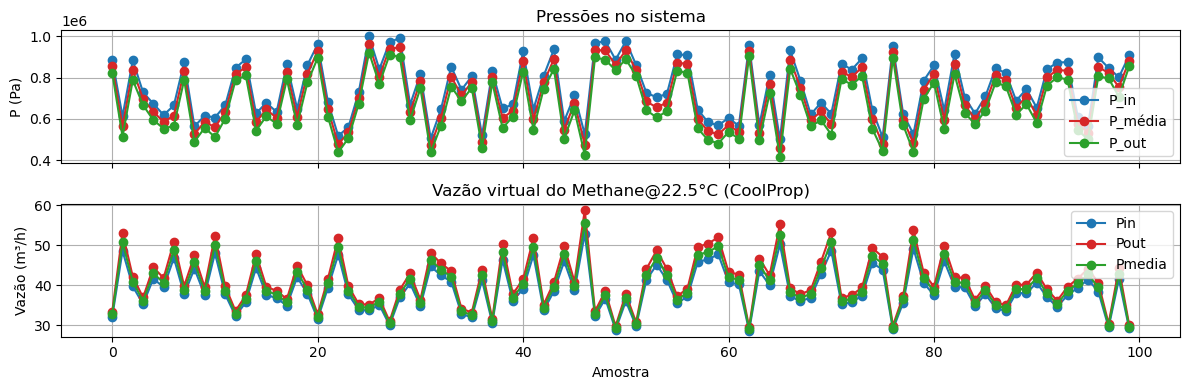

Vazão média @ Pin: 38.81 m³/h
Vazão média @ Pmédia: 39.95 m³/h
Vazão média @ Pout: 41.20 m³/h
Variação percentual média de Vazão: 10.45%
Desvio médio em relação à média: 2.40 m³/h


In [208]:
sensor_virtual_instanc.analise_visual_vazao_virtual_coolprop(T, sinal_Pin, sinal_delta_P, fluido='Methane')

# Encerrando a primeira parte

---

### Paradigma procedural vs. orientado a objetos

- O paradigma procedural organiza o código em funções e procedimentos, com dados e lógica separados.
- O paradigma orientado a objetos organiza o código em "objetos" ou "instância", que agrupam dados e comportamentos relacionados.

#### Vantagens práticas do paradigma orientado a objetos:
- Facilita a manutenção e evolução do código.
- Permite reutilização e extensão de funcionalidades.
- Torna o código mais próximo do mundo real, facilitando o entendimento.


Por exemplo, a bibmon:

In [2]:
import bibmon

In [8]:
print(dir(bibmon))

print('PCA documentation:')
print(bibmon.PCA.__doc__)


['Autoencoder', 'ESN', 'PCA', 'PreProcess', 'SBM', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_alarms', '_autoencoder', '_bibmon_tools', '_esn', '_generic_model', '_load_data', '_pca', '_preprocess', '_sbm', '_sklearn_manifold', '_sklearn_regressor', 'align_dfs_by_rows', 'comparative_table', 'complete_analysis', 'create_df_with_dates', 'create_df_with_noise', 'load_real_data', 'load_tennessee_eastman', 'real_process_data', 'sklearnManifold', 'sklearnRegressor', 'spearmanr_dendrogram', 'targets_comparative_table', 'tennessee_eastman', 'train_val_test_split']
PCA documentation:

    Principal Component Analysis.
    
    For details on the technique, see https://doi.org/10.3390/pr12020251
    
    Parameters
    ----------
    ncomp: int or float
           float: number between 0.0 and 1.0 that corresponds to the minimum 
                  fraction of accumulated variance for component selection;
    

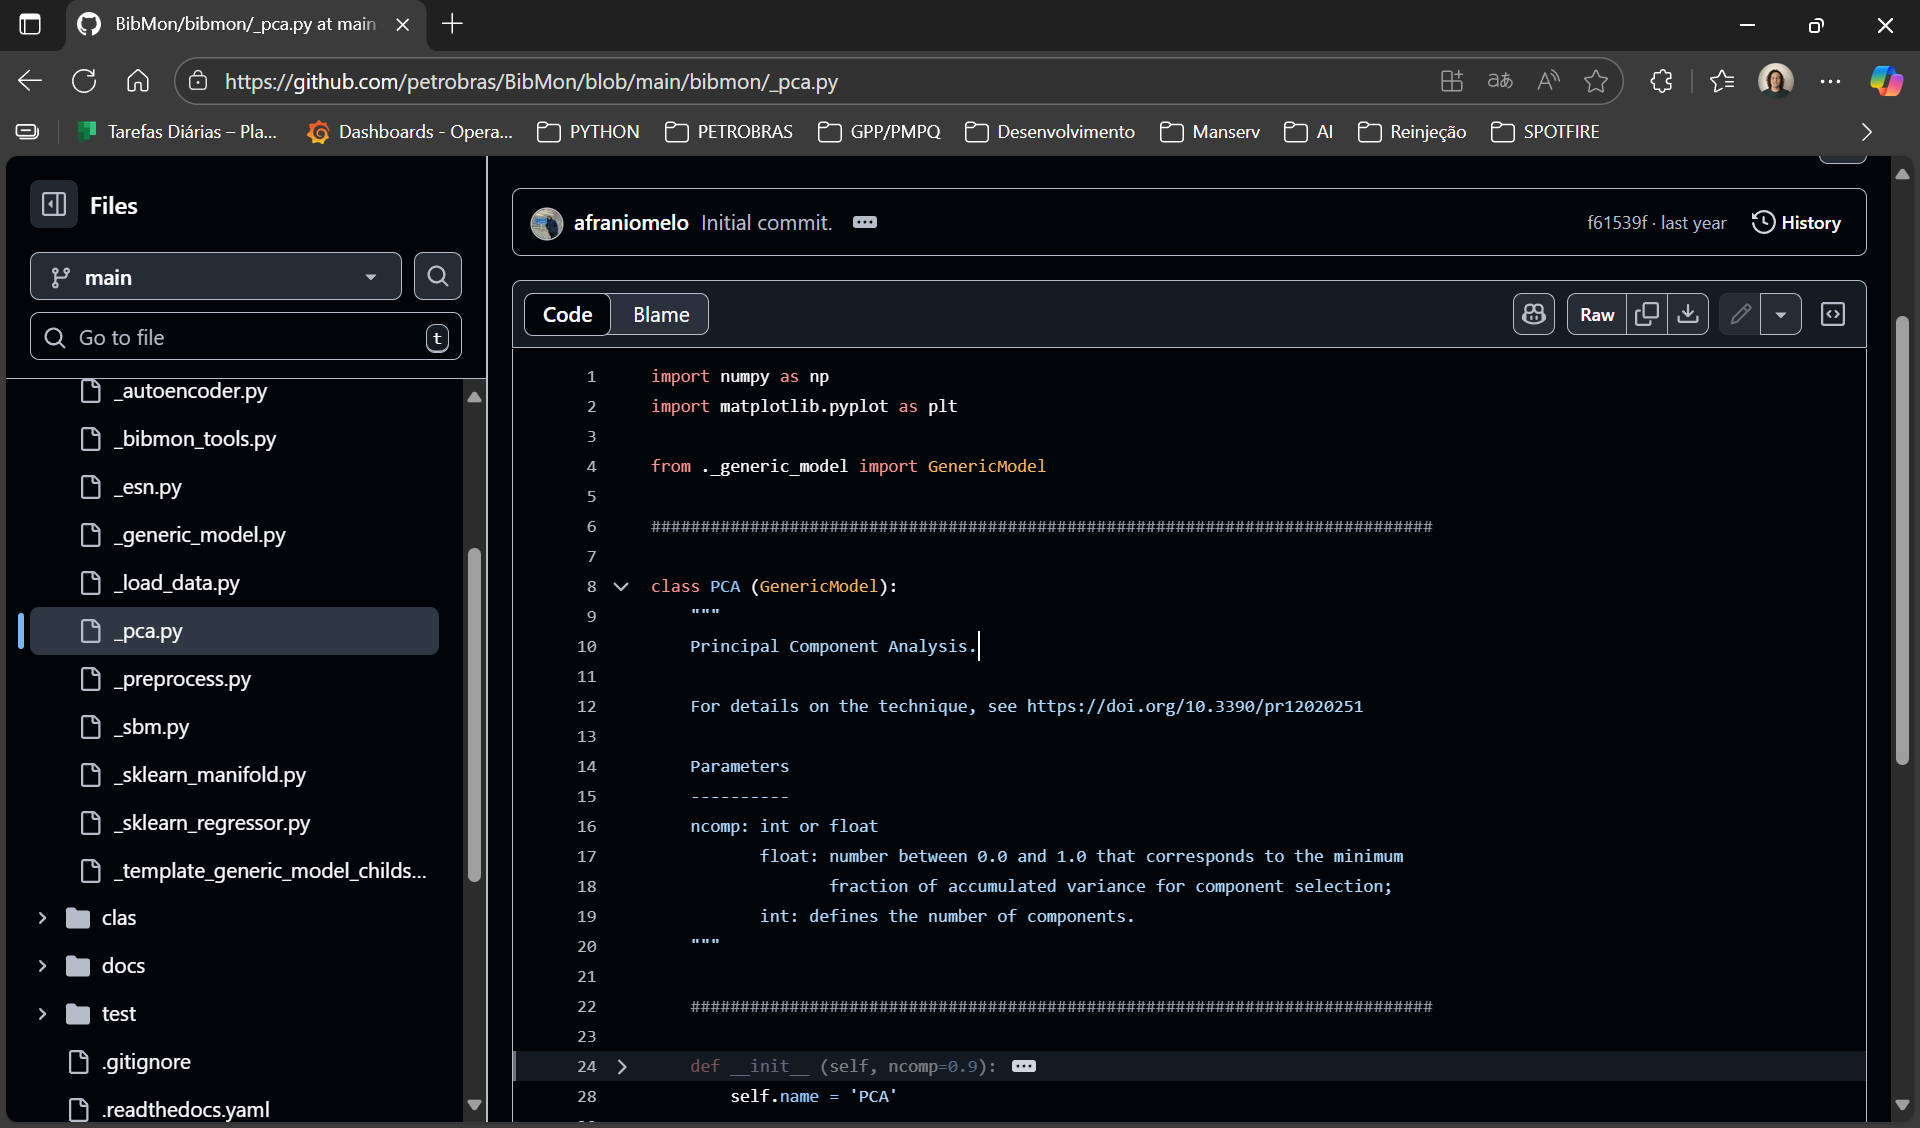

In [9]:
print('AE documentation:')
print(bibmon.Autoencoder.__doc__)


AE documentation:

    Autoencoder using sklearn's MLPRegressor interface. 
    For details on the parameters for input, see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
    


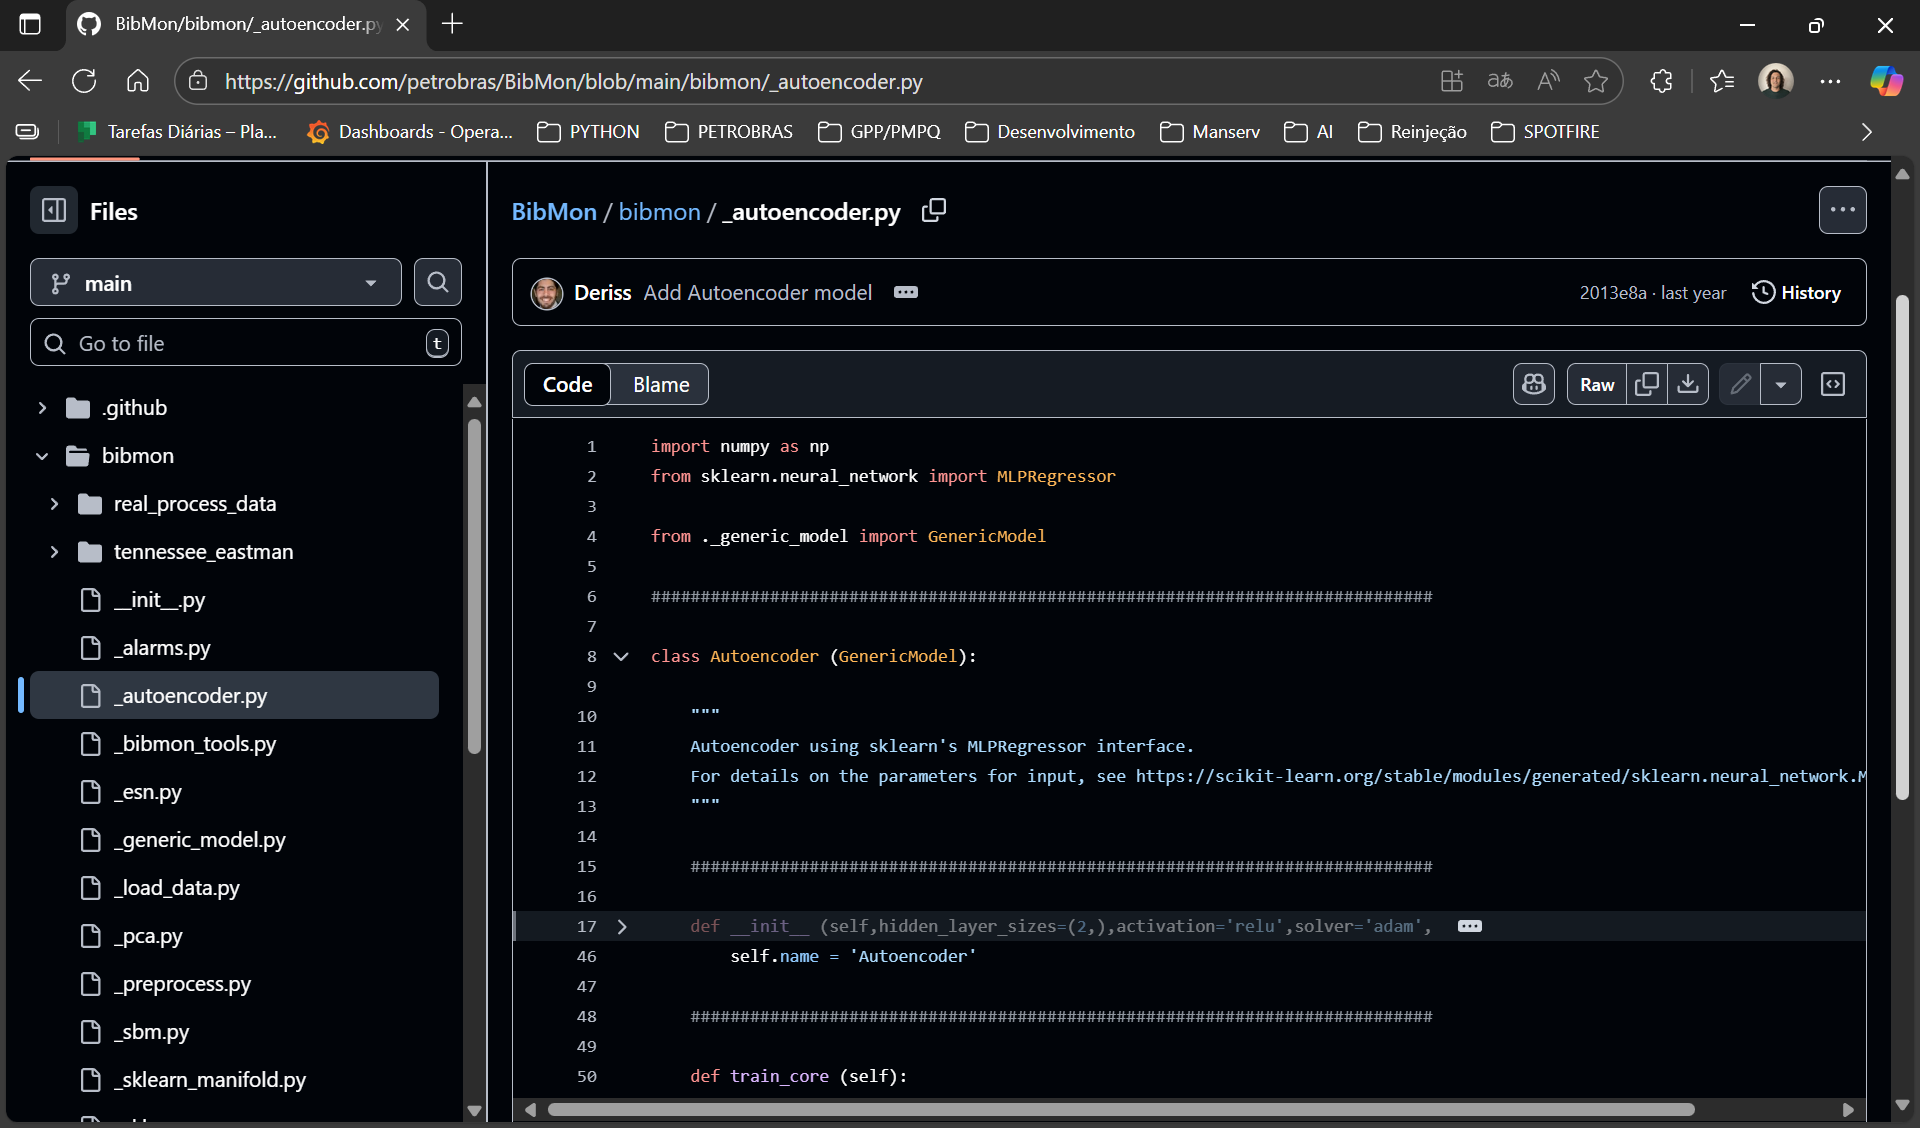

## Discussão prática

### Perguntas para reflexão
- Em que situações o procedural é suficiente?
- Quando vale a pena usar OO?
- Como a organização do código impacta a manutenção e evolução dos projetos?